In [2]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt

For time measure

In [3]:
%pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [4]:
%load_ext autotime

time: 0 ns (started: 2022-10-15 18:04:07 +02:00)


Get data from csv

In [5]:
colnames = ['x', 'y', 'cost']
TSPA = pd.read_csv('data/TSPA.csv', header=None, sep=';', names=colnames)
TSPB = pd.read_csv('data/TSPB.csv', header=None, sep=';', names=colnames)

time: 15 ms (started: 2022-10-15 18:04:07 +02:00)


In [6]:
TSPA

,x,y,cost
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
...,...,...,...
195,1023,1258,197
196,3192,1271,1183
197,3735,1879,1461
198,3983,299,1309


time: 47 ms (started: 2022-10-15 18:04:07 +02:00)


Get dictionaries from dataframes

In [7]:
tspa_dic = TSPA.to_dict('index')
tspb_dic = TSPB.to_dict('index')

time: 16 ms (started: 2022-10-15 18:04:08 +02:00)


In [81]:
# def get_costs(dic):
#     """
#     Get dictionary with costs.
#     """
#     cost_dic = {}
#     for key in dic.keys():
#         cost_dic[key] = dic[key]['cost']
#     return cost_dic

# tspa_costs = get_costs(tspa_dic)
# tspb_costs = get_costs(tspb_dic)

time: 0 ns (started: 2022-10-15 20:31:28 +02:00)


In [9]:
# def get_distances_np(dic):
#     """
#     Get all distances between all nodes as 2d matrix.
#     """
#     nodes_number = len(dic)
#     distances = np.empty(shape=(nodes_number, nodes_number))
#     for i in range(nodes_number-1):
#         for j in range(i+1, nodes_number):
#             starting_cords = np.array([dic[i]['x'], dic[i]['y']])
#             ending_cords = np.array([dic[j]['x'], dic[j]['y']])
#             dist = round(np.linalg.norm(starting_cords - ending_cords))
#             distances[i][j] = dist
#             distances[j][i] = dist
#     return distances


time: 0 ns (started: 2022-10-15 18:04:08 +02:00)


In [11]:

def calculate_distances(node, data):
    """
    Calculate Euclidean distances from a given node to all available nodes.
    """
    distances = {}
    starting_cords = np.array([node['x'], node['y']])
    for key in data.keys():
        ending_cords = np.array([data[key]['x'], data[key]['y']])
        dist = round(np.linalg.norm(starting_cords - ending_cords))
        distances[key] = dist
    return distances

def calculate_single_distance(starting_node, ending_node):
    """
    Calculate Euclidean distances between two nodes.
    """
    starting_cords = np.array([starting_node['x'], starting_node['y']])
    ending_cords = np.array([ending_node['x'], ending_node['y']])
    dist = round(np.linalg.norm(starting_cords - ending_cords))
    return dist

time: 15 ms (started: 2022-10-15 18:04:08 +02:00)


In [12]:
def random_solution(starting_node, data, total_cost, chosen_nodes):
    """
    Next node is chosen randomly.
    """
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        random_node = random.choice(list(data.keys()))
        end_node = data[random_node]
        dist = calculate_single_distance(start_node, end_node)
        total_cost.append(start_node['cost'])
        total_cost.append(dist)
        random_solution(random_node, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes

time: 15 ms (started: 2022-10-15 18:04:08 +02:00)


In [21]:
def random_solution_iterate(data):
    """
    Start from each point and get min and max values and best set of nodes.
    """
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        total_cost, chosen_nodes = random_solution(i, copy.deepcopy(data), total_cost = [], chosen_nodes = [])
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(len(min_cost_nodes))
    print(min_cost_nodes)
    return min_cost_nodes

random_points = random_solution_iterate(tspa_dic)


239192
282857
100
[33, 99, 92, 53, 131, 37, 61, 153, 56, 177, 27, 104, 112, 108, 51, 135, 154, 13, 76, 77, 20, 46, 118, 161, 64, 149, 45, 4, 183, 32, 144, 10, 79, 83, 103, 97, 148, 6, 182, 78, 196, 89, 94, 54, 156, 132, 136, 189, 75, 127, 91, 29, 158, 28, 81, 7, 55, 169, 19, 44, 66, 86, 82, 88, 164, 48, 1, 21, 50, 166, 142, 109, 151, 155, 126, 68, 106, 41, 195, 122, 170, 43, 117, 47, 14, 160, 98, 62, 190, 5, 74, 181, 25, 72, 192, 125, 22, 15, 174, 140]
time: 828 ms (started: 2022-10-15 18:08:50 +02:00)


In [14]:
def nearest_neighbor(starting_node, data, total_cost,chosen_nodes):
    """
    Next node is chosen as the nearest neighbor to the last node.
    """
    chosen_nodes.append(starting_node)
    while len(data) > 101:
        start_node = data.pop(starting_node)
        distances = calculate_distances(start_node, data)
        key_min = min(distances.keys(), key=(lambda k: distances[k]))
        nearest_node = data[key_min]
        total_cost.append(start_node['cost'])
        total_cost.append(distances[key_min])
        nearest_neighbor(key_min, data, total_cost, chosen_nodes)
    return sum(total_cost), chosen_nodes


time: 0 ns (started: 2022-10-15 18:04:09 +02:00)


In [15]:
def nearest_neighbor_iterate(data):
    """
    Start from each point and get min and max values and best set of nodes.
    """
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(len(data)):
        first_node = data[i]
        total_cost, chosen_nodes = nearest_neighbor(i, copy.deepcopy(data), total_cost = [], chosen_nodes = []) # 
        last_node = data[chosen_nodes[-1]]
        total_cost += calculate_single_distance(last_node, first_node)
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(min_cost_nodes)
    return min_cost, max_cost, min_cost_nodes


nn_points = nearest_neighbor_iterate(tspa_dic)[2]

108145
125277
[75, 189, 109, 119, 100, 33, 26, 13, 52, 148, 48, 92, 16, 152, 11, 162, 160, 198, 106, 125, 8, 105, 123, 124, 80, 191, 95, 169, 110, 139, 196, 51, 5, 112, 165, 73, 179, 12, 89, 42, 94, 122, 72, 190, 98, 156, 172, 66, 6, 68, 24, 67, 87, 144, 102, 44, 133, 154, 81, 171, 104, 184, 194, 79, 21, 157, 129, 170, 186, 127, 88, 153, 161, 76, 145, 151, 49, 38, 0, 115, 69, 149, 50, 121, 91, 114, 2, 4, 29, 187, 192, 150, 199, 39, 137, 177, 1, 41, 174, 173]
time: 38.7 s (started: 2022-10-15 18:04:09 +02:00)


In [76]:
def cycle_greedy(first, nearest_node, data, total_cost, chosen_nodes):
    """
    Version that checks all points and all edges.
    """
    while len(data) > 101:
        mini = np.inf
        for n in range(len(chosen_nodes)-1):
            i = chosen_nodes[n]
            j = chosen_nodes[n+1]
            for key in data.keys():
                i_next_dist = calculate_single_distance(i, data[key])
                j_next_dist = calculate_single_distance(data[key], j)
                if i_next_dist > 0 and j_next_dist > 0:
                    insertion_dist = i_next_dist + j_next_dist - calculate_single_distance(i, j)
                    if insertion_dist < mini:
                        mini = insertion_dist
                        indx = key
                        pos = n+1
                        inserted_node = data[key]
        chosen_nodes.insert(pos, inserted_node)
        total_cost.append(mini)
        total_cost.append(data.pop(indx)['cost'])
    return sum(total_cost), chosen_nodes

def cycle_greedy_nn(first, nearest_node, data, total_cost, chosen_nodes):
    """
    Version with the last node's nearest neighbor. Find the best edge to swap.
    """
    while len(data) > 101:
        mini = np.inf
        distances = calculate_distances(nearest_node, data)
        key_min = min(distances.keys(), key=(lambda k: distances[k]))
        nearest_node = data.pop(key_min)
        for n in range(len(chosen_nodes)-1):
            i = chosen_nodes[n]
            j = chosen_nodes[n+1]
            i_next_dist = calculate_single_distance(i, nearest_node)
            j_next_dist = calculate_single_distance(nearest_node, j)
            if i_next_dist > 0 and j_next_dist > 0:
                insertion_dist = i_next_dist + j_next_dist - calculate_single_distance(i, j)
                if insertion_dist < mini:
                    mini = insertion_dist
                    pos = n+1
        chosen_nodes.insert(pos, nearest_node)
        total_cost.append(mini)
        total_cost.append(nearest_node['cost'])
    return sum(total_cost), chosen_nodes

def cycle_greedy_iterate(data):
    """
    Start from each point and get min and max values and best set of nodes.
    """
    min_cost = np.inf
    max_cost = 0
    min_cost_nodes = []
    for i in range(10):#range(len(data)):
        dat = copy.deepcopy(data)
        total_cost = []
        chosen_nodes = []
        first_node = dat.pop(i)
        distances = calculate_distances(first_node, dat)
        key_min = min(distances.keys(), key=(lambda k: distances[k]))
        nearest_node = dat.pop(key_min)
        chosen_nodes.append(first_node)
        chosen_nodes.append(nearest_node)
        total_cost.append(2*calculate_single_distance(first_node, nearest_node))
        total_cost, chosen_nodes = cycle_greedy(first=first_node, nearest_node=nearest_node, data=dat, total_cost=total_cost, chosen_nodes=chosen_nodes) # one can change to cycle_greedy_nn
        #last_node = dat[chosen_nodes[-1]]
        #total_cost += calculate_single_distance(last_node, first_node)
        if total_cost < min_cost:
            min_cost = total_cost
            min_cost_nodes = chosen_nodes
        if total_cost > max_cost:
            max_cost = total_cost
    print(min_cost)
    print(max_cost)
    print(min_cost_nodes)
    return min_cost, max_cost, min_cost_nodes

time: 16 ms (started: 2022-10-15 20:19:05 +02:00)


In [77]:
min_cost, max_cost, cycle_greedy_points = cycle_greedy_iterate(tspa_dic)

110835
118982
[{'x': 2736, 'y': 795, 'cost': 1589}, {'x': 2818, 'y': 542, 'cost': 1724}, {'x': 2938, 'y': 624, 'cost': 1061}, {'x': 2724, 'y': 415, 'cost': 1373}, {'x': 2699, 'y': 379, 'cost': 1880}, {'x': 2706, 'y': 349, 'cost': 1890}, {'x': 2809, 'y': 265, 'cost': 870}, {'x': 2720, 'y': 99, 'cost': 1321}, {'x': 2357, 'y': 227, 'cost': 761}, {'x': 2285, 'y': 282, 'cost': 1946}, {'x': 2203, 'y': 351, 'cost': 1561}, {'x': 2145, 'y': 389, 'cost': 1462}, {'x': 2055, 'y': 446, 'cost': 142}, {'x': 1878, 'y': 511, 'cost': 636}, {'x': 1899, 'y': 430, 'cost': 684}, {'x': 1812, 'y': 325, 'cost': 657}, {'x': 1674, 'y': 295, 'cost': 388}, {'x': 1494, 'y': 530, 'cost': 1377}, {'x': 1525, 'y': 389, 'cost': 1945}, {'x': 1510, 'y': 353, 'cost': 84}, {'x': 1509, 'y': 334, 'cost': 1415}, {'x': 1549, 'y': 241, 'cost': 1106}, {'x': 1424, 'y': 69, 'cost': 150}, {'x': 1645, 'y': 78, 'cost': 1135}, {'x': 1810, 'y': 167, 'cost': 1437}, {'x': 2125, 'y': 360, 'cost': 145}, {'x': 2105, 'y': 269, 'cost': 541}, {

In [78]:
def plot_cycle_greedy(points):
    plt.rcParams["figure.figsize"] = (20,20)
    chosen_points_x = [p['x'] for p in points]
    chosen_points_x.append(chosen_points_x[0])
    chosen_points_y = [p['y'] for p in points]
    chosen_points_y.append(chosen_points_y[0])
    costs = [p['cost']/25 for p in points]
    costs.append(points[0]['cost']/25)
    plt.plot(chosen_points_x, chosen_points_y)
    plt.scatter(chosen_points_x, chosen_points_y, s=costs)
    plt.show()


time: 16 ms (started: 2022-10-15 20:23:46 +02:00)


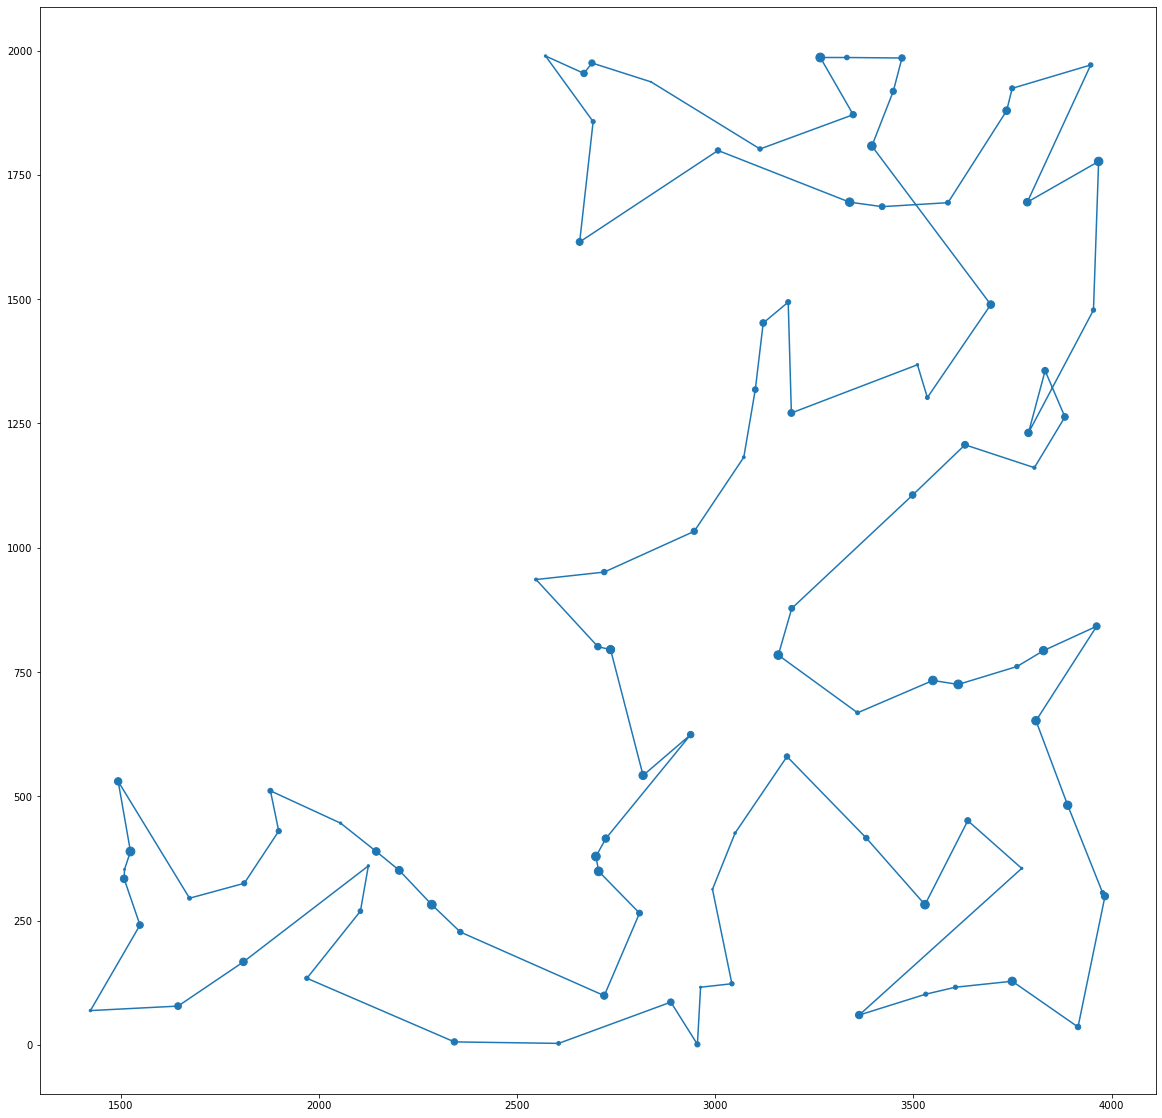

time: 344 ms (started: 2022-10-15 20:23:47 +02:00)


In [79]:
plot_cycle_greedy(cycle_greedy_points)

In [26]:
def plot_cycle(points):
    plt.rcParams["figure.figsize"] = (20,20)
    chosen_points_x = [tspa_dic[k]['x'] for k in points]
    chosen_points_x.append(chosen_points_x[0])
    chosen_points_y = [tspa_dic[k]['y'] for k in points]
    chosen_points_y.append(chosen_points_y[0])
    costs = [tspa_dic[k]['cost']/25 for k in points]
    costs.append(costs[0])
    plt.plot(chosen_points_x, chosen_points_y)
    plt.scatter(chosen_points_x, chosen_points_y, s=costs)
    plt.show()


time: 0 ns (started: 2022-10-15 18:09:41 +02:00)


Plot random solution

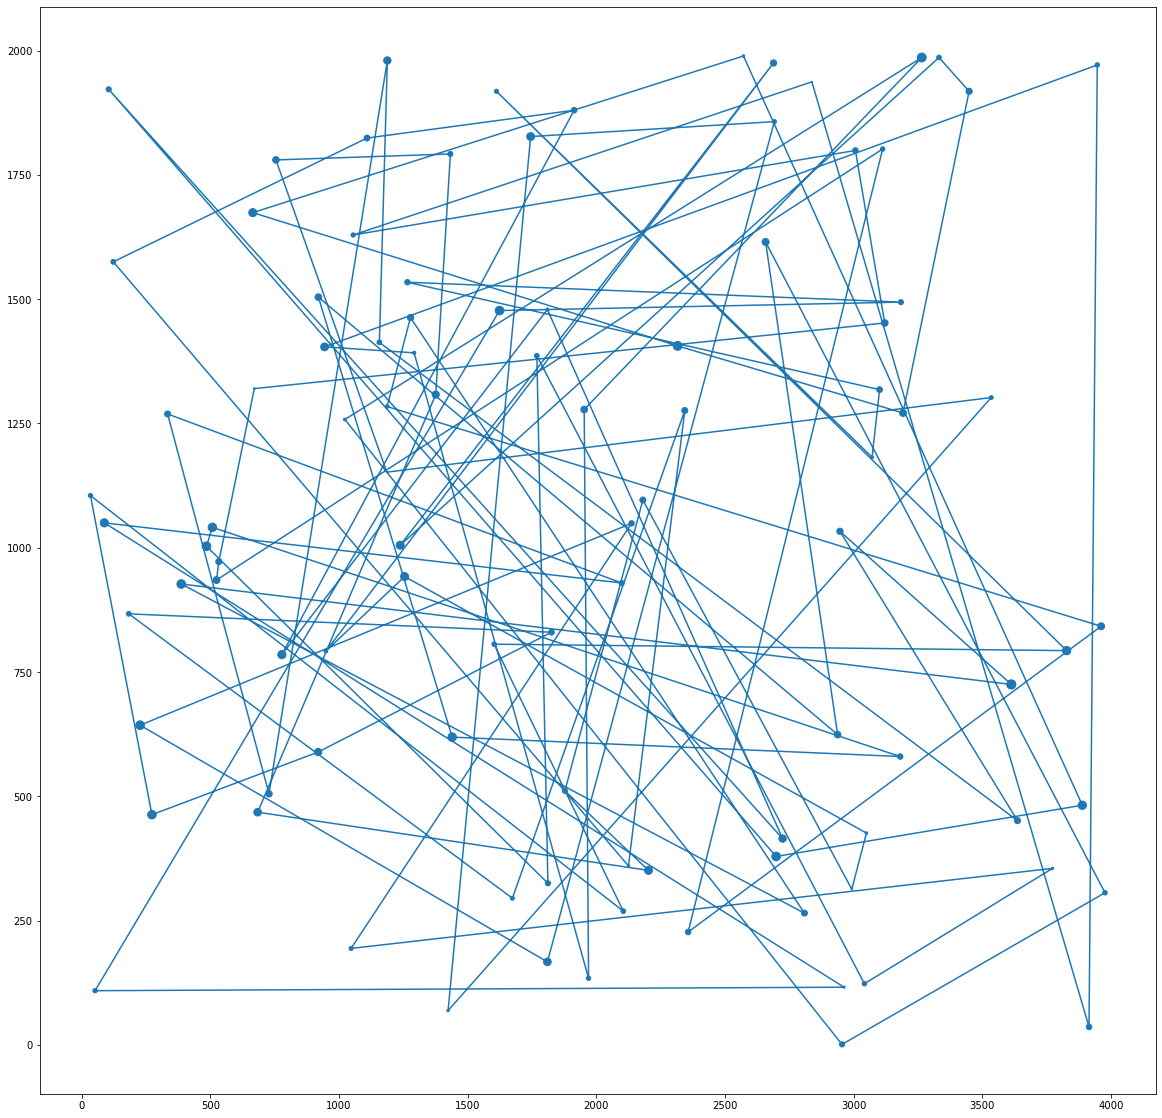

time: 594 ms (started: 2022-10-15 18:09:36 +02:00)


In [25]:
plot_cycle(random_points)

Plot nearest neighbors solution

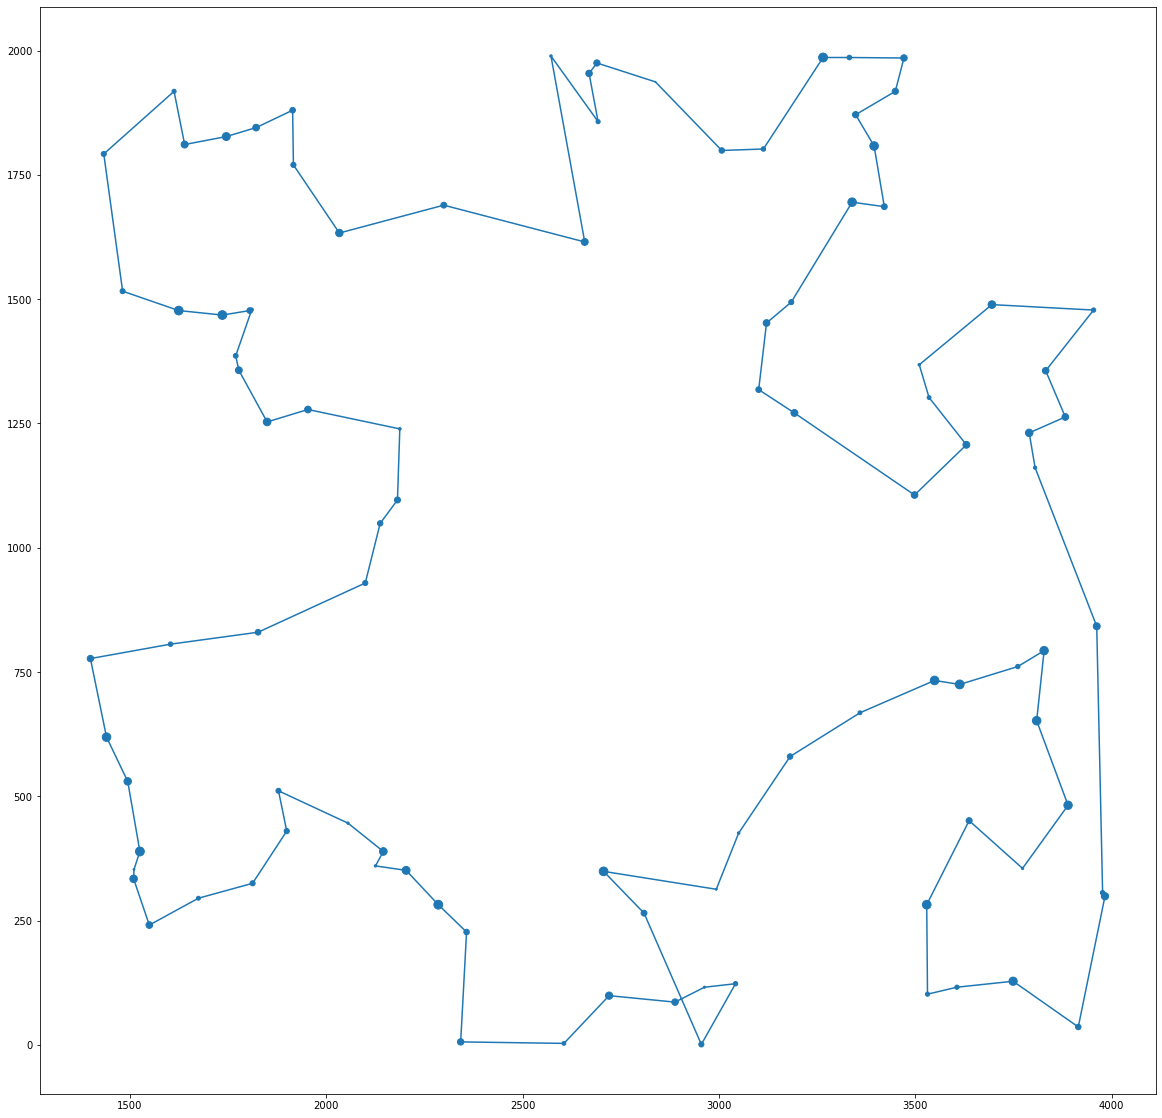

time: 422 ms (started: 2022-10-15 18:09:31 +02:00)


In [24]:
plot_cycle(nn_points)